# Challenge

Throughout this module, we introduced the amazing and yet challenging domain of unsupervised learning by covering some of the most popular clustering and dimensionality reduction algorithms. Now, it's time for you to apply your unsupervised learning knowledge. In this challenge, you'll work with a dataset of your choice. As always, Kaggle is one of your best friends. You can spend some time on Kaggle and pick a beautiful dataset. Using this dataset:

1. Apply dimensionality reduction techniques to visualize the observations.
2. Apply clustering techniques to group together similar observations.


In each of the tasks above, try alternative methods and select a best performing one. Discuss how dimensionality reduction and clustering algorithms enable you to gain insights regarding the data.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import matplotlib.patches as mpatches
import warnings
import time
warnings.filterwarnings("ignore")

### We will the use credit card fraud dataset from Kaggle.
https://www.kaggle.com/mlg-ulb/creditcardfraud

In [2]:
df = pd.read_csv('file:///Users/yutakatsuyama/Downloads/creditcard.csv')
df = df.dropna()

### First, we will check basic info of this dataset.

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
print("No Frauds", round(df["Class"].value_counts()[0]/len(df) * 100, 2), "% of the dataset")
print("Frauds", round(df["Class"].value_counts()[1]/len(df) * 100, 2), "% of the dataset")

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


# 1. Apply dimensionality reduction techniques to visualize the observations.

## Before moving forward, let' standardize the dataset

In [3]:
X = df.ix[:, df.columns != "Class"]
y = df.ix[:, df.columns == "Class"]

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [7]:
# # If it's to heavy to run, reduce dataset to 50% of original
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.1, random_state=42)

## Next, we apply PCA to the data. 

In [4]:
time_start = time.time()

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_std)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.6295087337493896 seconds


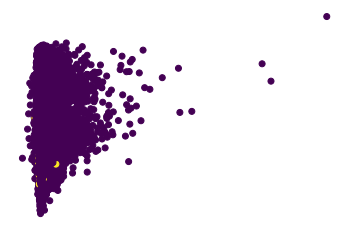

In [7]:
# Plot PCA components and clusters

plt.scatter(pca_components[:, 0],
            pca_components[:, 1],
            c=y.Class,
            cmap='viridis')
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

The graph above reveals how the two-dimensional representations of the classes(Fraud & Non-Fraud) spread along the two axes. It seems like "Fraud" occupies the left-bottom regions of the graph. 

However, local similarities seem not to be preserved well in the graph above. "Fraud" dispersed along the x-axis and intertwined with "Non-Fraud". Remember that we colored and tagged each point using the true class information we have. But in an unsupervised task, we wouldn't have that information. In this case, distinguishing the different digits in the graph above couldn't be made easily. 

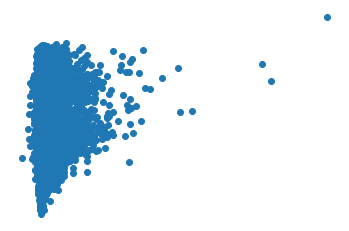

In [6]:
plt.scatter(pca_components[:, 0],
            pca_components[:, 1],
            )
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

As we can see, we cannot distinguish classes in the graphs.

Next, let's try t-SNE

In [14]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_std)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 284807 samples in 0.859s...
[t-SNE] Computed neighbors for 284807 samples in 6020.876s...
[t-SNE] Computed conditional probabilities for sample 1000 / 284807
[t-SNE] Computed conditional probabilities for sample 2000 / 284807
[t-SNE] Computed conditional probabilities for sample 3000 / 284807
[t-SNE] Computed conditional probabilities for sample 4000 / 284807
[t-SNE] Computed conditional probabilities for sample 5000 / 284807
[t-SNE] Computed conditional probabilities for sample 6000 / 284807
[t-SNE] Computed conditional probabilities for sample 7000 / 284807
[t-SNE] Computed conditional probabilities for sample 8000 / 284807
[t-SNE] Computed conditional probabilities for sample 9000 / 284807
[t-SNE] Computed conditional probabilities for sample 10000 / 284807
[t-SNE] Computed conditional probabilities for sample 11000 / 284807
[t-SNE] Computed conditional probabilities for sample 12000 / 284807
[t-SNE] Computed conditional pro

[t-SNE] Computed conditional probabilities for sample 124000 / 284807
[t-SNE] Computed conditional probabilities for sample 125000 / 284807
[t-SNE] Computed conditional probabilities for sample 126000 / 284807
[t-SNE] Computed conditional probabilities for sample 127000 / 284807
[t-SNE] Computed conditional probabilities for sample 128000 / 284807
[t-SNE] Computed conditional probabilities for sample 129000 / 284807
[t-SNE] Computed conditional probabilities for sample 130000 / 284807
[t-SNE] Computed conditional probabilities for sample 131000 / 284807
[t-SNE] Computed conditional probabilities for sample 132000 / 284807
[t-SNE] Computed conditional probabilities for sample 133000 / 284807
[t-SNE] Computed conditional probabilities for sample 134000 / 284807
[t-SNE] Computed conditional probabilities for sample 135000 / 284807
[t-SNE] Computed conditional probabilities for sample 136000 / 284807
[t-SNE] Computed conditional probabilities for sample 137000 / 284807
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 248000 / 284807
[t-SNE] Computed conditional probabilities for sample 249000 / 284807
[t-SNE] Computed conditional probabilities for sample 250000 / 284807
[t-SNE] Computed conditional probabilities for sample 251000 / 284807
[t-SNE] Computed conditional probabilities for sample 252000 / 284807
[t-SNE] Computed conditional probabilities for sample 253000 / 284807
[t-SNE] Computed conditional probabilities for sample 254000 / 284807
[t-SNE] Computed conditional probabilities for sample 255000 / 284807
[t-SNE] Computed conditional probabilities for sample 256000 / 284807
[t-SNE] Computed conditional probabilities for sample 257000 / 284807
[t-SNE] Computed conditional probabilities for sample 258000 / 284807
[t-SNE] Computed conditional probabilities for sample 259000 / 284807
[t-SNE] Computed conditional probabilities for sample 260000 / 284807
[t-SNE] Computed conditional probabilities for sample 261000 / 284807
[t-SNE] Computed con

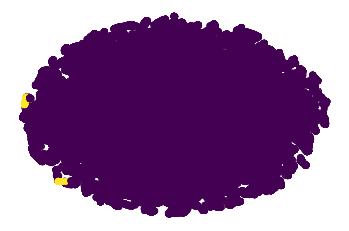

In [16]:
plt.scatter(tsne_results[:, 0],
            tsne_results[:, 1],
            c=y.Class,
            cmap='viridis')
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

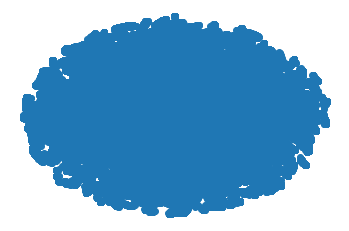

In [17]:
plt.scatter(tsne_results[:, 0],
            tsne_results[:, 1]
           )
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

As we can see, even with t-SNE, we cannot distinguish two classes. Also, it took considerable time to compute.

Next, let's try UMAP

In [15]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 593.4298920631409 seconds


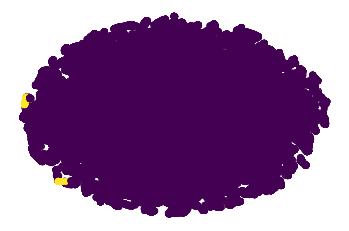

In [18]:
plt.scatter(tsne_results[:, 0],
            tsne_results[:, 1],
            c=y.Class,
            cmap='viridis')
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

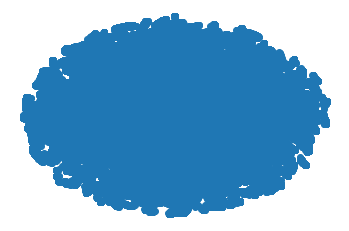

In [19]:
plt.scatter(tsne_results[:, 0],
            tsne_results[:, 1]
           )
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

We cannot distinguish two classes with UMAP as well. But, it's shorter to compute compared to t-SNE.

### Since Frauds is only 0.17 % of the dataset. Let's check what happens when we normalize the data.

In [8]:
#Normalize
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
121,77.0,-0.427191,0.745708,1.761811,-0.165130,0.058298,-0.213413,0.647323,0.073464,-0.291864,...,-0.201681,-0.432070,0.013164,0.161606,-0.401310,0.047423,0.102549,-0.116571,9.12,0
248296,153875.0,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,...,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,0.00,1
239,160.0,1.171439,0.474974,0.011761,1.264303,0.116234,-0.865986,0.554393,-0.276375,-0.471302,...,0.070051,0.278843,-0.097491,0.426278,0.744938,-0.274728,0.008472,0.015492,20.00,0
239501,150139.0,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,...,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,237.26,1
143336,85285.0,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,...,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92,1


### PCA

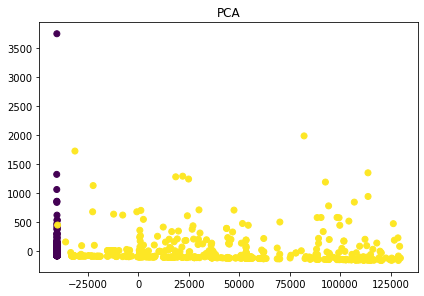

In [9]:
norm_X = new_df.ix[:, new_df.columns != "Class"]
norm_y = new_df.ix[:, df.columns == "Class"]

pca = PCA(n_components=2)
norm_pca_components = pca.fit_transform(norm_X)

plt.scatter(norm_pca_components[:, 0],
            norm_pca_components[:, 1],
            c=norm_y.Class,
            cmap='viridis')
    
plt.tight_layout()
plt.title('PCA')
plt.show()

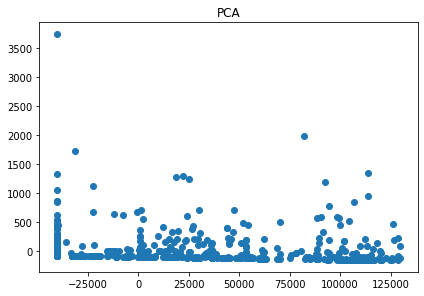

In [20]:
plt.scatter(norm_pca_components[:, 0],
            norm_pca_components[:, 1],
           )
    
plt.tight_layout()
plt.title('PCA')
plt.show()

If we use true data, we can see all the Fraud data goes to the left. But, without colour, it's still difficult to recognize two types.

### t-SNE

In [23]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
norm_tsne_results = tsne.fit_transform(norm_X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 984 samples in 0.001s...
[t-SNE] Computed neighbors for 984 samples in 0.043s...
[t-SNE] Computed conditional probabilities for sample 984 / 984
[t-SNE] Mean sigma: 26.997326
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.817162
[t-SNE] KL divergence after 300 iterations: 0.301512
t-SNE done! Time elapsed: 2.262223243713379 seconds


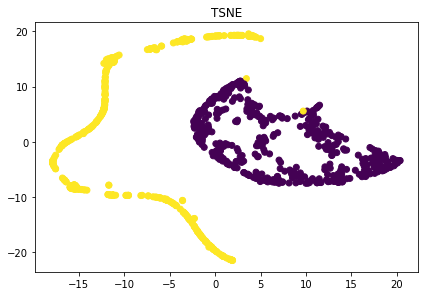

In [11]:
plt.scatter(norm_tsne_results[:, 0],
            norm_tsne_results[:, 1],
            c=norm_y.Class,
            cmap='viridis')
    
plt.tight_layout()
plt.title('TSNE')
plt.show()

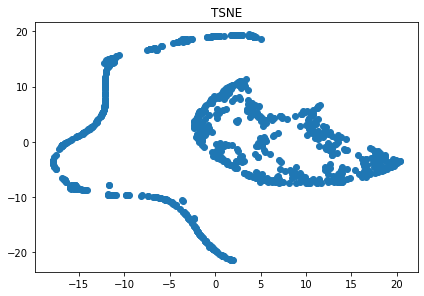

In [21]:
plt.scatter(norm_tsne_results[:, 0],
            norm_tsne_results[:, 1])
    
plt.tight_layout()
plt.title('TSNE')
plt.show()

With t-SNE, now we can see there are two classes.

### UMAP

In [27]:
time_start = time.time()

norm_umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(norm_X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 0.9218831062316895 seconds


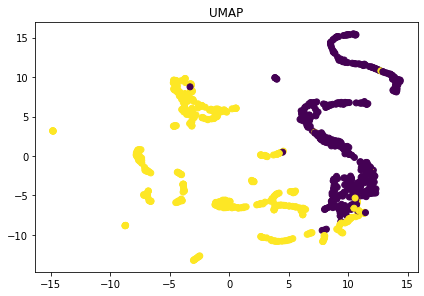

In [28]:
plt.scatter(norm_umap_results[:, 0],
            norm_umap_results[:, 1],
            c=norm_y.Class,
            cmap='viridis')
    
plt.tight_layout()
plt.title('UMAP')
plt.show()

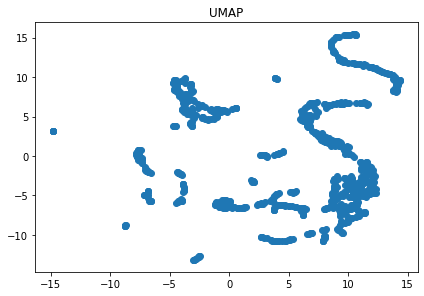

In [29]:
plt.scatter(norm_umap_results[:, 0],
            norm_umap_results[:, 1]
           )
    
plt.tight_layout()
plt.title('UMAP')
plt.show()

UMAP enables us to distinguish there are two classes when we use true data, but if not, it's difficult. Although, it's faster than the t-SNE.

# 2. Apply clustering techniques to group together similar observations.

## K-means

Apply K-means, then visualize the predictions and the true labels of the observations. To plot in two-dimensional space, we need to reduce our data dimensionality. For this purpose, we apply t-SNE because it worked the best.

26 ms ± 921 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


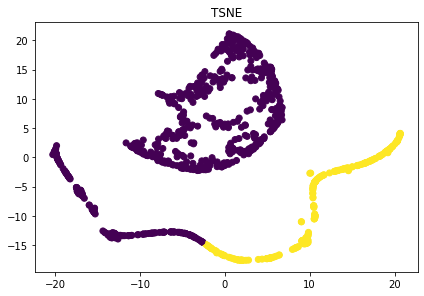

In [33]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(norm_X)
kmeans_cluster = kmeans_cluster.predict(norm_X)

# Plot the solution.
plt.scatter(norm_tsne_results[:, 0],
            norm_tsne_results[:, 1],
            c=kmeans_cluster,
            cmap='viridis')
    
plt.tight_layout()
plt.title('TSNE')
plt.show()

Clusters seem to failed capture the correct grouping in the data and the algorithm took around 26 milliseconds to run. Next, we'll use MiniBatchKMeans.

18.1 ms ± 693 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


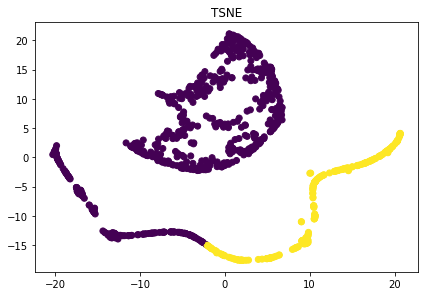

In [36]:
# Defining the mini-batch k-means
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=50)

# Fit model
%timeit minikmeans_cluster.fit(norm_X)
minikmeans_cluster = minikmeans_cluster.predict(norm_X)


# Plot the solution.
plt.scatter(norm_tsne_results[:, 0],
            norm_tsne_results[:, 1],
            c=minikmeans_cluster,
            cmap='viridis')
    
plt.tight_layout()
plt.title('TSNE')
plt.show()

MiniBatchKMeans is faster than KMeans, but the result is very similar.

In [48]:
print("Adjusted Rand Index of the K-means Clustering solution: {}"
      .format(metrics.adjusted_rand_score(norm_y.Class, kmeans_cluster)))
print("Adjusted Rand Index of the Mini K-means Clustering solution: {}"
      .format(metrics.adjusted_rand_score(norm_y.Class, minikmeans_cluster)))

Adjusted Rand Index of the K-means Clustering solution: 0.32563900820272457
Adjusted Rand Index of the Mini K-means Clustering solution: 0.3233207175994704


In [45]:
a
print("Silhouette score for two cluster mini k-means: {}".format(metrics.silhouette_score(norm_X, minikmeans_cluster, metric='euclidean')))

Silhouette score for two cluster k-means: 0.7483184698211172
Silhouette score for two cluster mini k-means: 0.7482323363329054


K-means assumes that the underlying "true" clusters are radially symmetrical (isotropic), meaning that they are uniform in all directions and the edges curve outward. If this assumption fails, k-means would come up with unuseful clusters.  However, this data is non-isotropic. Therefore, it doesn't work well.

Overall, the comparison is not very decisive.

## Agglomerative clustering

Below, we sketch the dendrogram using the complete linkage method. By investigating this dendrogram, we can try to choose the number of clusters that match most to our needs.

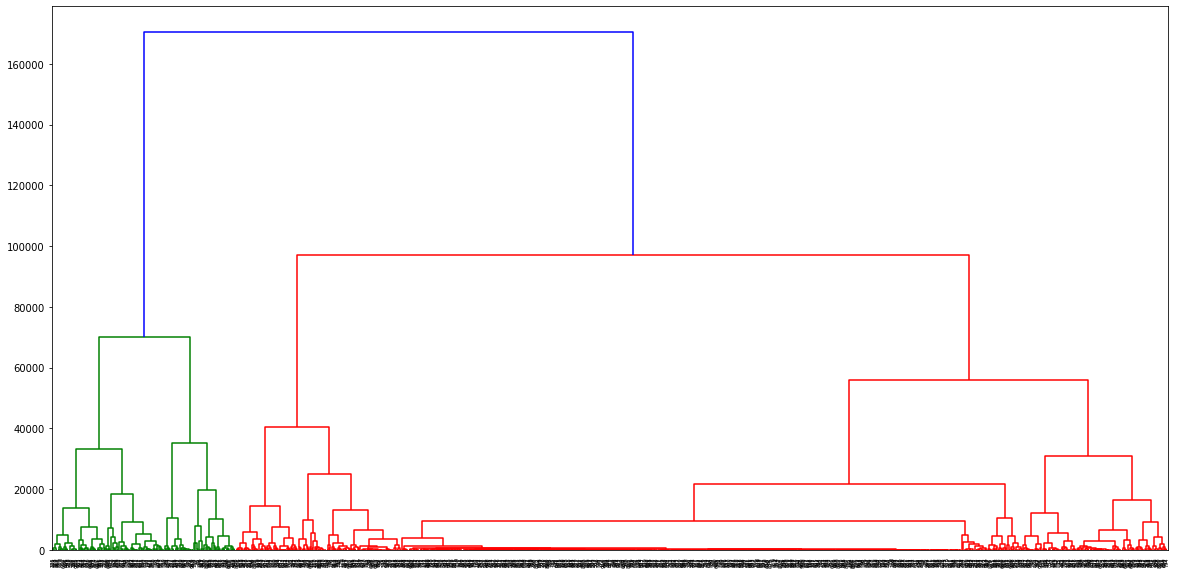

In [52]:
plt.figure(figsize=(20,10))
dendrogram(linkage(norm_X, method='complete'))
plt.show()

n_cluster should be 2.

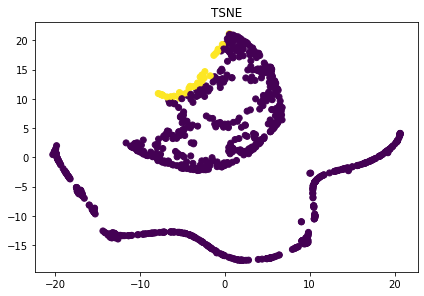

In [87]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
agg_cluster = agg_cluster.fit_predict(norm_X)


# Plot the solution.
plt.scatter(norm_tsne_results[:, 0],
            norm_tsne_results[:, 1],
            c=agg_cluster,
            cmap='viridis')
    
plt.tight_layout()
plt.title('TSNE')
plt.show()

In [53]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(norm_y.Class, agg_cluster)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(norm_X, agg_cluster, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.005509086054851564
The silhoutte score of the Agglomerative Clustering solution: -0.3960514735720306


It looks like KMeans clusterings works better than Agglomerative clustering. 

## DBSCAN

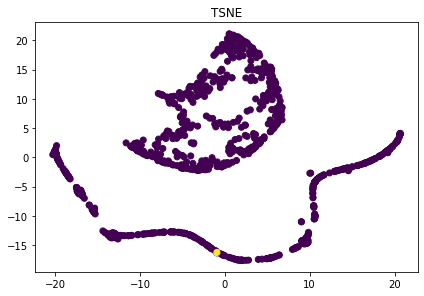

In [76]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=2, min_samples=5,metric="euclidean")

# Fit model
db_cluster = dbscan_cluster.fit_predict(norm_X)


# Plot the solution.
plt.scatter(norm_tsne_results[:, 0],
            norm_tsne_results[:, 1],
            c=db_cluster,
            cmap='viridis')
    
plt.tight_layout()
plt.title('TSNE')
plt.show()

In [77]:
print("Adjusted Rand Index of the DBSCANsolution: {}"
      .format(metrics.adjusted_rand_score(norm_y.Class, db_cluster)))
print("The silhoutte score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(norm_X, db_cluster, metric='euclidean')))

Adjusted Rand Index of the DBSCANsolution: 0.0001240633031490867
The silhoutte score of the DBSCAN solution: 0.015478898348219066


DBSCAN dosen't work well as Agglomerative clustering.

## GMM

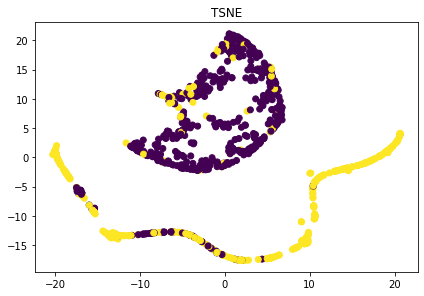

In [79]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
gmm_cluster = gmm_cluster.fit_predict(norm_X)

# Plot the solution.
plt.scatter(norm_tsne_results[:, 0],
            norm_tsne_results[:, 1],
            c=gmm_cluster,
            cmap='viridis')
    
plt.tight_layout()
plt.title('TSNE')
plt.show()

In [80]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(norm_y.Class, gmm_cluster)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(norm_X, gmm_cluster, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.5743306383051958
The silhoutte score of the GMM solution: 0.4428677758739677


### GMM
- Adjusted Rand Index of the GMM solution: 0.5743306383051958
- The silhoutte score of the GMM solution: 0.4428677758739677

### MiniKMeans
- Adjusted Rand Index of the Mini K-means Clustering solution was 0.3233207175994704
- Silhouette score for two cluster mini k-means was 0.7482323363329054

# Conclusion

For dimentionality reduction, t-SNE worked the best. For clustering, overall GMM or KMeans worked the best. But, to decide the algorithm, we need more observations.

